<a href="https://colab.research.google.com/github/bhupathi-20/Cryptocurrency-forecasting/blob/main/crypto_ver6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required libraries

In [1]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.6/304.6 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.8 MB/s

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import gradio as gr
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
# from statsmodels.tsa.stattools import adfuller
# from pmdarima import auto_arima
import statsmodels.api as sm
# from scipy import stats
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from datetime import datetime, timedelta
from math import floor
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM
# from tensorflow.keras.optimizers import Adam
import io
from PIL import Image

In [4]:
#taking top 15 cryptocurrencies
cryptocurrencies = ['BTC-USD', 'ETH-USD', 'BNB-USD',
                   'USDT-USD', 'ADA-USD', 'USDC-USD',
                   'SOL-USD', 'XRP-USD', 'DOT-USD',
                   'DOGE-USD', 'AVAX-USD', 'SHIB-USD',
                   'MATIC-USD', 'BUSD-USD',
                  ]

In [5]:
crypto_names = [i[:-4] for i in cryptocurrencies]
crypto_names

['BTC',
 'ETH',
 'BNB',
 'USDT',
 'ADA',
 'USDC',
 'SOL',
 'XRP',
 'DOT',
 'DOGE',
 'AVAX',
 'SHIB',
 'MATIC',
 'BUSD']

In [6]:
for cryptocurrency in cryptocurrencies:
    name = f'df_' + cryptocurrency.split('-')[0] + '_daily'
    print(f'Name of our dataset : {name}')
    globals()[name] = yf.download(cryptocurrency, group_by = 'Ticker', period = 'max')

Name of our dataset : df_BTC_daily
[*********************100%%**********************]  1 of 1 completed
Name of our dataset : df_ETH_daily
[*********************100%%**********************]  1 of 1 completed
Name of our dataset : df_BNB_daily
[*********************100%%**********************]  1 of 1 completed
Name of our dataset : df_USDT_daily
[*********************100%%**********************]  1 of 1 completed
Name of our dataset : df_ADA_daily
[*********************100%%**********************]  1 of 1 completed
Name of our dataset : df_USDC_daily
[*********************100%%**********************]  1 of 1 completed
Name of our dataset : df_SOL_daily
[*********************100%%**********************]  1 of 1 completed
Name of our dataset : df_XRP_daily
[*********************100%%**********************]  1 of 1 completed
Name of our dataset : df_DOT_daily
[*********************100%%**********************]  1 of 1 completed
Name of our dataset : df_DOGE_daily
[*********************100%

In [7]:
df_BNB_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800


In [8]:
df_BNB_daily.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,False,False,False,False,False,False
2017-11-10,False,False,False,False,False,False
2017-11-11,False,False,False,False,False,False
2017-11-12,False,False,False,False,False,False
2017-11-13,False,False,False,False,False,False
...,...,...,...,...,...,...
2023-12-09,False,False,False,False,False,False
2023-12-10,False,False,False,False,False,False
2023-12-11,False,False,False,False,False,False


In [9]:
df_AVAX_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-13,4.613968,4.915115,4.481499,4.896294,4.896294,28340
2020-07-14,4.909865,5.229564,4.762068,4.986754,4.986754,3957
2020-09-22,4.986754,11.463443,4.125380,5.234632,5.234632,288098840
2020-09-23,5.321654,5.329310,3.982604,4.118469,4.118469,173091214
2020-09-24,3.817925,4.751878,3.539887,4.566561,4.566561,96110964


##### There's discontinuity in the AVAX data so we're dropping first two rows

In [10]:
df_AVAX_daily = df_AVAX_daily.iloc[2:]

### Removing outliers in the data

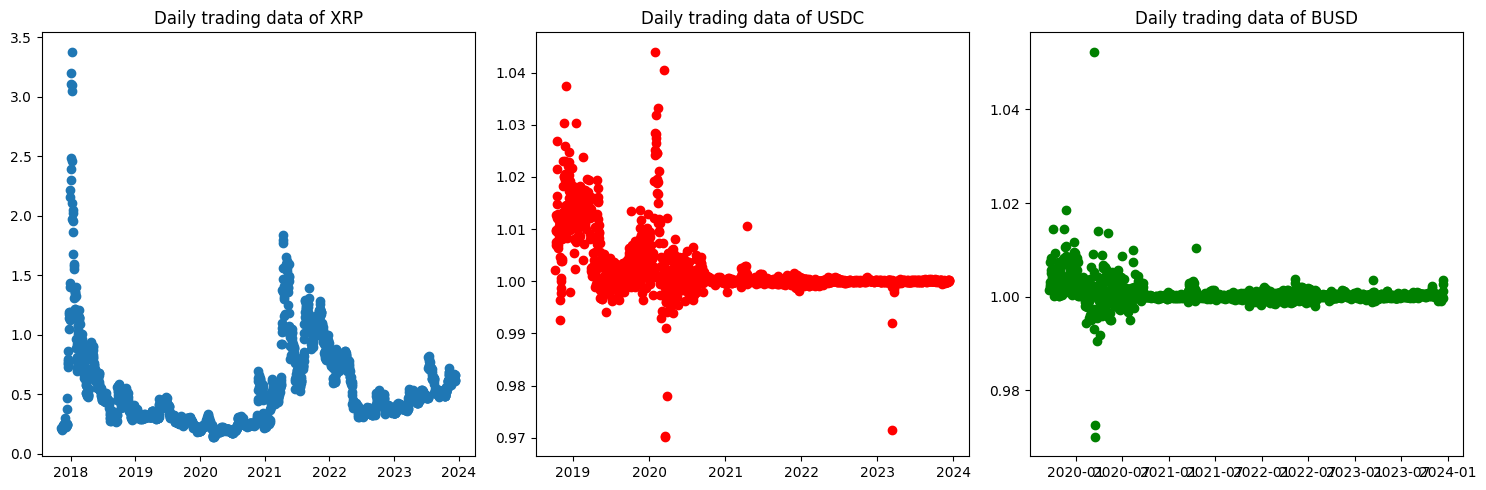

In [11]:
df1 = globals()['df_XRP_daily'].copy()
x1, y1 = df1.index,  df1.Close

df2 = globals()['df_USDC_daily'].copy()
x2, y2 = df2.index,  df2.Close

df3 = globals()['df_BUSD_daily'].copy()
x3, y3 = df3.index,  df3.Close

# Create subplots with different x-ranges
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot data on each subplot with specific x-ranges
axes[0].scatter(x1, y1)
axes[0].set_title('Daily trading data of XRP')

axes[1].scatter(x2, y2, color = 'red')
axes[1].set_title('Daily trading data of USDC')

axes[2].scatter(x3, y3, color = 'green')
axes[2].set_title('Daily trading data of BUSD')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
def show_outliers_zscore(name, threshold):
    name = f'df_{name}_daily'
    data = globals()[name].Close
    z_scores = np.abs((data - data.mean()) / data.std())
    filtered_data = data[z_scores < threshold]
    outliers = data[z_scores > threshold]
    return filtered_data, outliers

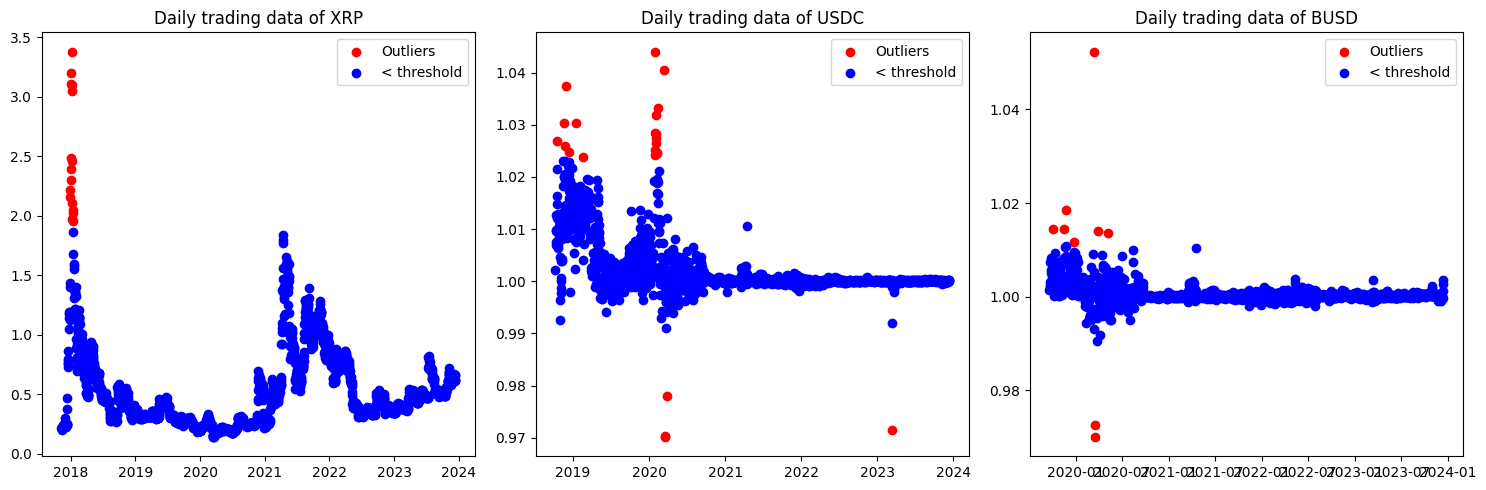

In [13]:
# Remove outliers using Z-score
threshold = 4
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot data on each subplot
filtered_data, outliers = show_outliers_zscore('XRP', threshold)
axes[0].scatter(outliers.index, list(outliers), color = 'red', label = 'Outliers')
axes[0].scatter(filtered_data.index, list(filtered_data), color = 'blue', label = '< threshold')
axes[0].set_title('Daily trading data of XRP')
axes[0].legend()

filtered_data, outliers = show_outliers_zscore('USDC', threshold)
axes[1].scatter(outliers.index, list(outliers), color = 'red', label = 'Outliers')
axes[1].scatter(filtered_data.index, list(filtered_data), color = 'blue', label = '< threshold')
axes[1].set_title('Daily trading data of USDC')
axes[1].legend()

filtered_data, outliers = show_outliers_zscore('BUSD', threshold)
axes[2].scatter(outliers.index, list(outliers), color = 'red', label = 'Outliers')
axes[2].scatter(filtered_data.index, list(filtered_data), color = 'blue', label = '< threshold')
axes[2].set_title('Daily trading data of BUSD')
axes[2].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
# transforming/replacing the outliers
def replace_outliers_zscore(name, threshold):
    name = f'df_{name}_daily'
    data = globals()[name]
    close_mean = data.Close.mean()
    z_scores = np.abs((data - data.mean()) / data.std())
    for i in range(len(data)):
        if z_scores.Close.iloc[i] > threshold:
            if data.Close.iloc[i] < 1:
                data.Close.iloc[i] = close_mean
            else:
                data.Close.iloc[i] = (data.Close.iloc[i])**(1/3)
    return data

threshold = 4
for i in ['XRP', 'USDC', 'BUSD']:
    globals()[f'df_{i}_daily']= replace_outliers_zscore(i, threshold)

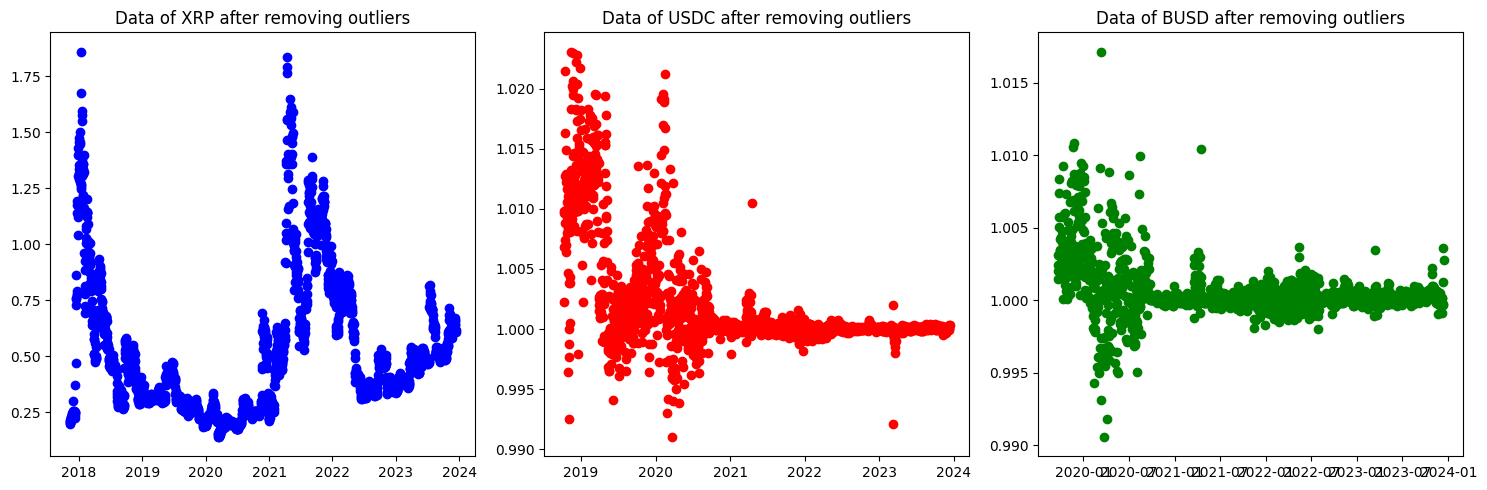

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot data on each subplot
axes[0].scatter(df_XRP_daily.index,list(df_XRP_daily.Close), color = 'blue')
axes[0].set_title('Data of XRP after removing outliers')

axes[1].scatter(df_USDC_daily.index,list(df_USDC_daily.Close), color = 'red')
axes[1].set_title('Data of USDC after removing outliers')

axes[2].scatter(df_BUSD_daily.index,list(df_BUSD_daily.Close), color = 'green')
axes[2].set_title('Data of BUSD after removing outliers')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Weekly, monthly, quarterly dataframes

In [16]:
''' To check if the weekly/monthly quaterly dataframe's
latest day is exceeding the actual latest date
and return the rectified dataframe if exceeding. '''
def df_checker(df, freq):
    new_df = df.resample(freq).mean()
    if new_df.iloc[-1].name > df.iloc[-1].name:
        return new_df.iloc[:-1]
    else:
        return new_df

In [17]:
weekly_dfs, monthly_dfs, quarterly_dfs = [], [], []
for name in crypto_names:
    df = globals()[f'df_{name}_daily']
    new_name_weekly = f'df_{name}_weekly'
    globals()[new_name_weekly] = df_checker(df, 'W')
    new_name_monthly = f'df_{name}_monthly'
    globals()[new_name_monthly] = df_checker(df, 'M')
    new_name_quarterly = f'df_{name}_quarterly'
    globals()[new_name_quarterly] = df_checker(df, 'Q')

## Dataset attributes

* Open : The opening price of the Bitcoin on that particular day
* High : The highest price of Bitcoin in that particular day
* Low : The lowest price of Bitcoin in that particular day
* Close : The closing price of Bitcoin on that particular day
* Adj Close : The adjusted closing price of Bitcoin on that particular day
* Volume : It refers to the total number of tokens or coins traded in a given period

### Splitting our data for training, cross validation, testing

In [18]:
# using 80% of our data for training,20% for testing
def train_test_split(coin, freq):
    data = globals()[f'df_{coin}_{freq}']
    split_row = floor(0.8*data.shape[0])
    training_data = data[:split_row]
    testing_data = data[split_row: ]
#     print(f'Training data shape : {training_data.shape}')
#     print(f'Testing data shape : {testing_data.shape}')
    return training_data, testing_data

In [19]:
# from google.colab import drive
# drive.mount('/content/drive')

In [21]:
# freq = 'daily'
# for coin in crypto_names:
#     name = f'{coin}_lstm_{freq}'
#     globals()[name] = tf.keras.models.load_model(f"/kaggle/input/lstm-models/{name}.h5") #change the path as required
#     print(f'{coin} {freq} LSTM model loaded')

In [26]:
from google.colab import files
uploaded=files.upload()

Saving ADA_lstm_daily.h5 to ADA_lstm_daily.h5
Saving AVAX_lstm_daily.h5 to AVAX_lstm_daily.h5
Saving BNB_lstm_daily.h5 to BNB_lstm_daily.h5
Saving BTC_lstm_daily.h5 to BTC_lstm_daily.h5
Saving BTC_lstm_weekly.h5 to BTC_lstm_weekly.h5
Saving BUSD_lstm_daily.h5 to BUSD_lstm_daily.h5
Saving busd_lstm_daily_old.h5 to busd_lstm_daily_old.h5
Saving DOGE_lstm_daily.h5 to DOGE_lstm_daily.h5
Saving DOT_lstm_daily.h5 to DOT_lstm_daily.h5
Saving ETH_lstm_daily.h5 to ETH_lstm_daily.h5
Saving MATIC_lstm_daily.h5 to MATIC_lstm_daily.h5
Saving SHIB_lstm_daily.h5 to SHIB_lstm_daily.h5
Saving SOL_lstm_daily.h5 to SOL_lstm_daily.h5
Saving USDC_lstm_daily.h5 to USDC_lstm_daily.h5
Saving usdc_lstm_daily_old.h5 to usdc_lstm_daily_old.h5
Saving USDT_lstm_daily.h5 to USDT_lstm_daily.h5
Saving XRP_lstm_daily.h5 to XRP_lstm_daily.h5
Saving xrp_lstm_daily_old.h5 to xrp_lstm_daily_old.h5


GUI for make prediction

In [27]:
#### Execute all of the below cells

# final LSTM models
# daily models
freq = 'daily'
for coin in crypto_names:
    name = f'{coin}_lstm_{freq}'
    globals()[name] = tf.keras.models.load_model(f"{name}.h5") #change the path as required
    print(f'{coin} {freq} LSTM model loaded')

# weekly models
# name = 'BTC_lstm_weekly'
# globals()[name] = tf.keras.models.load_model(f"/kaggle/input/lstm-models/{name}.h5")
# print('BTC weekly LSTM model loaded')

BTC daily LSTM model loaded
ETH daily LSTM model loaded
BNB daily LSTM model loaded
USDT daily LSTM model loaded
ADA daily LSTM model loaded
USDC daily LSTM model loaded
SOL daily LSTM model loaded
XRP daily LSTM model loaded
DOT daily LSTM model loaded
DOGE daily LSTM model loaded
AVAX daily LSTM model loaded
SHIB daily LSTM model loaded
MATIC daily LSTM model loaded
BUSD daily LSTM model loaded


In [28]:
def lstm_prediction_maker(coin, days_ahead, time_steps = 20):
    df = globals()[f'df_{coin}_daily'].copy()
    latest_date = df.index[-1]  #the latest date we have in our dataset
    predictions = []
    mms = MinMaxScaler()
    df['mms_close'] = mms.fit_transform(np.array(df.Close).reshape(-1, 1))
    temp_data = np.array(df.mms_close.iloc[-time_steps:])
    model = globals()[f'{coin}_lstm_daily']
    for i in range(days_ahead):
        prediction = model.predict(temp_data.reshape(1, time_steps), verbose = 0)
        temp_data = np.append(temp_data, [prediction[0][0]])[-time_steps:]
        predictions.append(float(prediction[0][0]))
    prediction_df = {
        'true_prediction' : mms.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
    }
    date_range = pd.date_range(start = latest_date, periods = days_ahead, freq = 'D', name = 'Date')
    prediction_df = pd.Series(mms.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten(), index = date_range)
    return prediction_df

## Making predictions

We are taking the frequency as 'weekly' for ARIMA models because the accuracy for LSTM models for short periods is greater than ARIMA models. But if we take weekly data, ARIMA models are having higher accuracy.

In [29]:
# final ARIMA models
freq = 'weekly'

weekly_arima_params = {
    'BUSD' : (30,1,5),
    'DOGE': (15,1,15),
    'DOT':(20,1,18),
    'ETH':(20,1,2),
    'MATIC':(40,1,10),
    'SHIB':(16,1,5),
    'SOL':(40,1,0),
    'USDC':(15,1,40),
    'USDT':(15,1,20),
    'XRP':(14, 0, 17),
    'ADA':(20,1,30),
    'AVAX':(9,2,12),
    'BNB':(9,1,18),
    'BTC' : (30, 1, 15)
}

# takes approximately 5 minutes to run
for coin, params in weekly_arima_params.items():
    train, test = train_test_split(coin, freq)
    model_name = f'{coin}_arima_{freq}'
    globals()[model_name] = ARIMA(train.Close, order=(params[0],params[1],params[2])).fit()
    print(f'{coin} training done !')


BUSD training done !
DOGE training done !
DOT training done !
ETH training done !
MATIC training done !
SHIB training done !
SOL training done !
USDC training done !
USDT training done !
XRP training done !
ADA training done !
AVAX training done !
BNB training done !
BTC training done !


In [30]:
def model_predictor(coin, future_date, freq, periods_ahead):
    if freq!='daily':
        df = globals()[f'df_{coin}_{freq}']
        model = globals()[f'{coin}_arima_{freq}']
        test_length = len(df) - floor(0.8*len(df))
        num_steps = test_length + periods_ahead
        predictions = model.forecast(steps = num_steps)
    else:
        #win_size = 20
        #predictions, future_dates = moving_average(win_size, periods_ahead, coin)
        #predictions = pd.Series(predictions, index = future_dates)

        predictions = lstm_prediction_maker(coin, periods_ahead)

    return predictions


In [31]:
def pl_func(coin, future_date):
    current_datetime = datetime.now()
    current_date = current_datetime.date()
    days_ahead = (future_date.date() - current_date).days
    if days_ahead >= 20:
        freq = 'weekly'
        periods_ahead = int(round(days_ahead/7, 0))
        lod = days_ahead%7
        predictions = model_predictor(coin, future_date,freq, periods_ahead)
        profit = predictions.iloc[-1] - predictions.iloc[-periods_ahead-1]
        if predictions.index[-1]>future_date:
            if profit > 0:
                profit -= (profit/lod)
            else:
                    profit += (profit/lod)
        else:
            profit += (profit/lod)
    else:
        freq = 'daily'
        periods_ahead = days_ahead
        predictions = model_predictor(coin, future_date,freq, periods_ahead)
        profit = predictions.iloc[-1] - predictions.iloc[0]

    return profit, periods_ahead, freq, predictions

In [44]:
def pl_plotter(coin, future_date):
    d, m, y = [int(i) for i in future_date.split('-')]
    future_date = datetime(d, m, y)
    prof, periods_ahead, freq, predictions = pl_func(coin, future_date)
    df = globals()[f'df_{coin}_{freq}'].copy()
    plt.title(f'{coin} Currency Prediction')
    back = periods_ahead*3 if periods_ahead*3 < len(df) else len(df)
    plt.plot(df.Close[-back:],label = 'Historical')
    if freq=='weekly':
        predictions.index.values[predictions.index == df.index[-1]] = future_date
        predictions.iloc[-1] += prof
        predictions = predictions[-periods_ahead:]
    plt.plot(predictions.index, list(predictions),linestyle = '--' ,label = 'Predictions')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=30)
    plt.show()

    # Save the plot to an in-memory buffer as an image
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close()

    rss = rss_feedback_interface(coin)
    return np.array(Image.open(buf)), str(prof), rss

# Create an interface using Gradio
app4 = gr.Interface(fn=pl_plotter,
                     title="Price Forecast",
                     inputs=[
                         gr.Dropdown(crypto_names, label = "Choose currency"),
                         gr.Textbox(lines=1, placeholder="yyyy-mm-dd", label = "Enter future date"),
                     ],
                     outputs = [gr.Image(type='numpy', label = "Plot"), gr.Text(label = "Profit/Loss($)"), gr.HTML(label="RSS Feedback")],
                     )

# app4.launch(debug=True)

In [35]:
def coins_suggestor(future_date,expected_profit):
    expected_profit = int(expected_profit)
    d, m, y = [int(i) for i in future_date.split('-')]
    future_date = datetime(d, m, y)
    current_datetime = datetime.now()
    current_date = current_datetime.date()
    days_ahead = (future_date.date() - current_date).days
    if days_ahead <= 20:
        freq = 'daily'
        periods_ahead = days_ahead
    else:
        freq = 'weekly'

        periods_ahead = int(round(days_ahead/7, 0))
        lod = days_ahead%7
    expected_coins = []
    profits = {}
    for coin in crypto_names:
        predictions = model_predictor(coin, future_date,freq, periods_ahead)
        if freq != 'daily':
            profit = predictions.iloc[-1] - predictions.iloc[-periods_ahead-1]
            if predictions.index[-1]>future_date:
                profit -= (profit/lod)
            else:
                profit += (profit/lod)
        else:
            profit = predictions.iloc[-1] - predictions.iloc[0]
        profits[coin] = profit
    profits = dict(sorted(profits.items(), key=lambda item: item[1], reverse = True))
    cumulative_predicted_profit, cumulative_res = 0, []
    index, start_index = -1, 0
    for k, v in profits.items():
        index += 1
        cumulative_predicted_profit += v
        if cumulative_predicted_profit >= expected_profit:
            expected_coins.append(list(profits.keys())[start_index : index + 1])
            start_index = index + 1
            cumulative_res.append(cumulative_predicted_profit)
            cumulative_predicted_profit = 0
    if len(expected_coins) == 0:
        return 'Oops! No coins found satisfying your requirement'
    else:
        result_list = list(zip(expected_coins, cumulative_res))
        formatted_result = [f"{coin}: {profit}" for coin, profit in result_list]
        return formatted_result


In [36]:
app6 = gr.Interface(
    fn=coins_suggestor,
    title="Get Investment Suggestions",
    inputs=[
        gr.Textbox(lines = 1, placeholder="yyyy-mm-dd", label = "Enter future date"),
        gr.Text(label="Enter expected profit($)")
    ],
    outputs=gr.Text(label = "Suggested coins")
)
#app6.launch(debug=True)

GUI for **Correlation Checker**

In [37]:
def correlation_checker(coin):
    positive_correlated, negative_correlated = [], []
    true_df = globals()[f'df_{coin}_daily'].copy()
    mms2 = MinMaxScaler()
    true_df['scaled'] = mms2.fit_transform(np.array(true_df.Close).reshape(-1,1))
    true_len = len(true_df)
    filtered_cryptonames = crypto_names.copy()
    filtered_cryptonames.remove(coin)
    for name in filtered_cryptonames:
        corr_df = globals()[f'df_{name}_daily'].copy()
        corr_df['scaled'] = mms2.fit_transform(np.array(corr_df.Close).reshape(-1,1))
        corr_len = len(corr_df)
        if true_len > corr_len:
            correlation_coefficient = (true_df['scaled'].iloc[-corr_len:]).corr(corr_df['scaled'])
        else:
            correlation_coefficient = (true_df['scaled']).corr(corr_df['scaled'].iloc[-true_len:])
        if correlation_coefficient > 0:
            positive_correlated.append([name, correlation_coefficient])
        else:
            negative_correlated.append([name, correlation_coefficient])

    # Combine the output lines with newline characters
    positive_output = "\n".join([f"{name}: {correlation:.4f}" for name, correlation in positive_correlated])
    negative_output = "\n".join([f"{name}: {correlation:.4f}" for name, correlation in negative_correlated])

    img = correlation_plot(positive_correlated, negative_correlated, coin)
    return img, f"Positive Correlations:\n{positive_output}\n\nNegative Correlations:\n{negative_output}"


In [38]:
def correlation_plot(pos_corr, neg_corr, corr):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    for i in pos_corr:
        coin1 = i[0]
        df = globals()[f'df_{coin1}_daily'].copy()
        mms2 = MinMaxScaler()
        df['scaled'] = mms2.fit_transform(np.array(df.Close).reshape(-1,1))
        axes[0].plot(df.scaled, label = coin1)

    df = globals()[f'df_{corr}_daily'].copy()
    mms2 = MinMaxScaler()
    df['scaled'] = mms2.fit_transform(np.array(df.Close).reshape(-1,1))

    for i in range(2):
        axes[i].plot(df.scaled, label = 'Selected coin')
        axes[i].legend()
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Price ($)')
    axes[0].set_title('Scaled Positively correlated currencies')

    for i in neg_corr:
        coin1 = i[0]
        df = globals()[f'df_{coin1}_daily'].copy()
        mms2 = MinMaxScaler()
        df['scaled'] = mms2.fit_transform(np.array(df.Close).reshape(-1,1))
        axes[1].plot(df.scaled, label = coin1)
    axes[1].set_title('Scaled Negatively correlated currencies')
    axes[1].legend()
    plt.tight_layout()
    plt.show()

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close()

    return np.array(Image.open(buf))

In [50]:
# Create the Gradio interface
app2=gr.Interface(
    fn=correlation_checker,                  # The function to be called
    inputs=[gr.Dropdown(crypto_names, label = "Choose currency")],                       # Input component
    outputs=[gr.Image(type='numpy', label = "Correlation Plot"), gr.Text(label = "Correlation Scores")],                     # Output component
    live=True,                               # Launch the interface in a web browser
    title="Cryptocurrency Correlation Checker",  # Title of the interface
    description="Check the correlation of a cryptocurrency with others."  # Description of the interface
)
#app2.launch()

In [40]:
def correctness_percentage(actual, predicted):
    actual = [ float(i) for i in actual.split(',') ]
    predicted = [float(i) for i in predicted.split(',')]
    actual, predicted = np.array(actual), np.array(predicted)
    abs_percentage_error = np.abs((actual-predicted) / actual)
    mape = np.mean(abs_percentage_error) * 100
    return f"{round((100 - mape),2)}%"
inputs=[gr.Text(label = "Enter actual values"),gr.Text(label = "Enter predicted values")]
outputs=gr.Text(label = "Correctness Percentage")
app3=gr.Interface(correctness_percentage,
                  inputs=inputs,
                  outputs=outputs,
                  title="Check Accuracy of Predictions",
                  examples=[["Actual=110,120,130,140"],
                            ["Prdeicted=120,120,130,140"]]
                 )
#app3.launch(debug=True)


# **GUI for Moving Average**

In [41]:
def moving_average_plotter(coin, window_size):
    window_size = int(window_size)
    filtered_df = globals()[f'df_{coin}_daily'].copy()
    #fig=plt.figure()
    fig, ax = plt.subplots(figsize=(15,11))
    #filtered_df.Close.plot(label='Raw', ax=ax)
    # fig=plt.figure()
    filtered_df.Close.rolling(window_size).mean().plot(label='20D MA', ax=ax)

    plt.title(f"Moving Average of {coin}")
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Close ($)")
    fig.canvas.draw()
    plot_img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    plot_img = plot_img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.clf()
    return (plot_img)
    #plt.show()

In [45]:
app1=gr.Interface(fn=moving_average_plotter,
                  title = 'Check Moving Average',
                  inputs=[gr.Dropdown(crypto_names, label = "Choose currency"),gr.Text(label = "Enter window size")],
                  outputs=gr.Image(type='numpy', label = "Moving Average Plot"))
#app1.launch(debug=True)

In [46]:
pip install feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=9d09afd734f7e1bdc3a6a247208a8a90d37ca00569061f431479c65d4ae22d63
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [ ]:
import feedparser
# import gradio as gr
from datetime import datetime

def get_crypto_rss_feedback(crypto_name):
    feed_url = f"https://news.google.com/rss/search?q={crypto_name}%20cryptocurrency"
    feed = feedparser.parse(feed_url)

    feedback_list = []

    if 'entries' in feed:
        for entry in feed.entries:
            formatted_date = datetime.strptime(entry.published, "%a, %d %b %Y %H:%M:%S %Z")
            feedback = {
                "Title": entry.title,
                "Published Date": formatted_date.strftime('%Y-%m-%d %H:%M:%S'),
                "Summary": entry.summary,
                "Link": entry.link
            }
            feedback_list.append(feedback)

    return feedback_list

def format_feedback(feedback_list):
    formatted_feedback = ""
    for entry in feedback_list[:10]:
        formatted_entry = f'<a href="{entry["Link"]}" target="_blank">{entry["Title"]}</a><br>'
        formatted_feedback += formatted_entry
    return formatted_feedback

def rss_feedback_interface(crypto_name):
    feedback = get_crypto_rss_feedback(crypto_name)
    formatted_feedback = format_feedback(feedback)
    return formatted_feedback

app10 = gr.Interface(
    fn=rss_feedback_interface,
    inputs=gr.Textbox(lines=1, label="Enter Cryptocurrency Name"),
    outputs=gr.HTML(label="RSS Feedback")
)

# app10.launch()


In [51]:
#combine to create a multipage app
import gradio as gr
demo = gr.TabbedInterface([app1, app2,app4,app6,app3,app10], ["Moving Average", "Correlated Currencies","Make predictions","Investment suggestor","Check Accuracy","RSS Feed"])
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://79a17ce3cdb8cccfd8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
